## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





51.515 %
[60.0, 44.55, 52.058, 47.317, 49.572, 52.306, 49.14, 51.089, 50.523, 51.724, 50.222, 48.588, 48.5, 48.785, 49.083, 49.934, 48.611, 48.053, 50.521, 50.78, 50.049, 51.365, 51.168, 51.612, 50.412, 49.871, 50.352, 49.606, 50.168, 49.531, 49.431, 50.885, 49.405, 50.247, 49.833, 49.965, 49.238, 49.806, 49.948, 49.518, 49.419, 50.181, 50.247, 49.931, 50.528, 49.538, 49.344, 50.095, 50.783, 49.788, 49.807, 48.986, 50.519, 49.51, 50.069, 49.42, 50.252, 50.039, 49.885, 50.675, 50.153, 49.834, 50.471, 49.592, 49.783, 49.817, 49.243, 49.542, 50.75, 49.641, 50.403, 49.84, 50.392, 50.169, 50.756, 49.594, 50.088, 51.019, 48.798, 50.191, 50.721, 49.129, 49.502, 50.277, 49.685, 49.712, 49.324, 50.723, 50.478, 49.844, 49.786, 50.185, 50.027, 50.005, 50.095, 49.672, 49.5, 49.704, 49.813, 50.31]


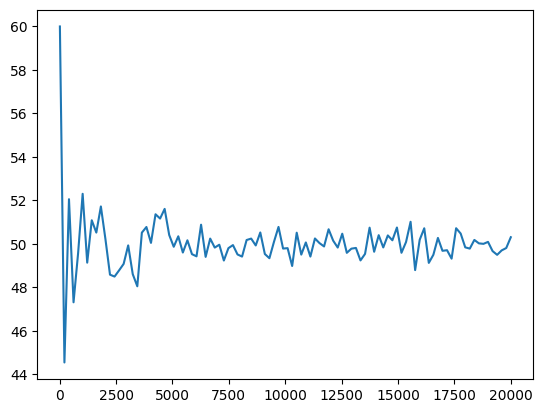

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns

def lancio(n):
    lista = [random.choice([0, 1]) for _ in range(n)]
    return round(sum(lista)/n *100,3)

print(lancio(99),"%")  

dim = np.linspace(10, 20000, 100, dtype=int)

frequenze = [lancio(n) for n in dim] 

print(frequenze)

plt.plot(dim, frequenze)
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

Righe: 891 Colonne: 12

Valori mancanti
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicate: 0

Età media per classe:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


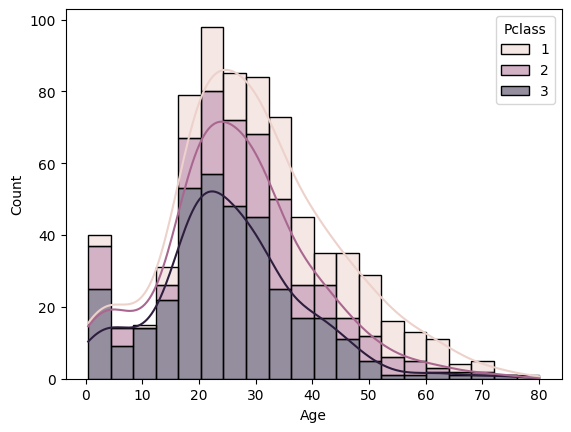

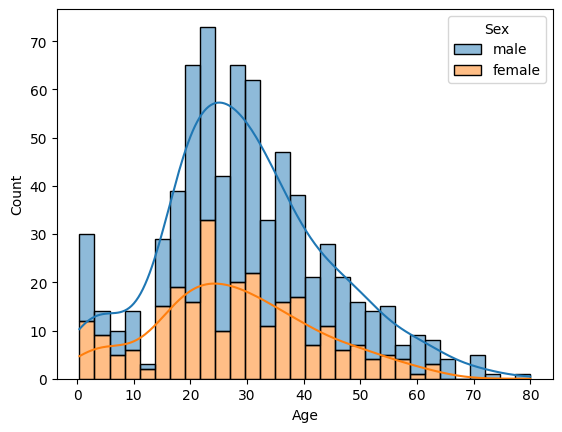

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

print(f"Righe: {df.shape[0]} Colonne: {df.shape[1]}")


print("\nValori mancanti")
print(df.isnull().sum())


df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


df.dropna(subset=['Age'], inplace=True)


print("\nDuplicate:", df.duplicated().sum())


age_mean_per_class = df.groupby('Pclass')['Age'].mean()
for pclass in df['Pclass'].unique():
    df.loc[(df['Pclass'] == pclass) & (df['Age'].isnull()), 'Age'] = age_mean_per_class[pclass]
    
print("\nEtà media per classe:")
print(age_mean_per_class)


sns.histplot(data=df, x='Age', hue='Pclass', multiple="stack", kde=True)
plt.show()

sns.histplot(data=df, x='Age', hue='Sex', multiple="stack", bins=30, kde=True, hue_order=['male', 'female'])
plt.show()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

Distribuzione delle specie:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Lunghezza e larghezza media dei petali:
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


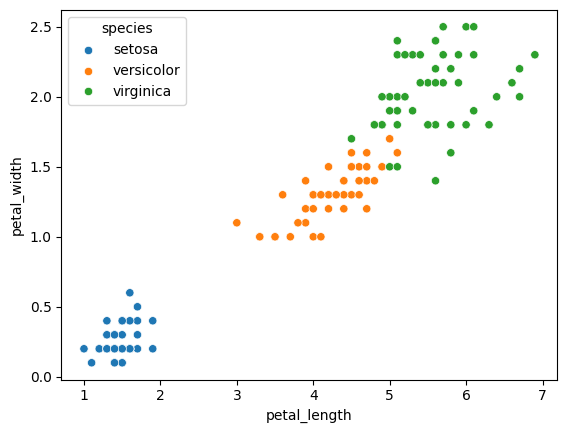

   petal_length  petal_width  area
0           1.4          0.2  0.28
1           1.4          0.2  0.28
2           1.3          0.2  0.26
3           1.5          0.2  0.30
4           1.4          0.2  0.28


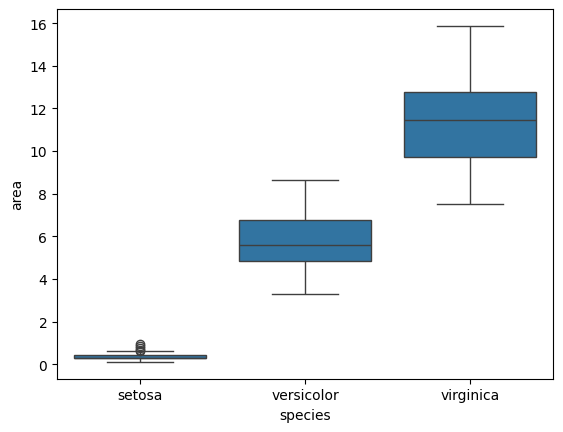

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

print("Distribuzione delle specie:")
print(df['species'].value_counts())

print("\nLunghezza e larghezza media dei petali:")
mean_petal = df.groupby('species')[['petal_length', 'petal_width']].mean()  
print(mean_petal)

sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)  
plt.show()

df['area'] = df['petal_length'] * df['petal_width']
print(df[['petal_length', 'petal_width', 'area']].head()) 

sns.boxplot(x='species', y='area', data=df)
plt.show()
